# Оценка А/Б тестов с помощью проверки статистических гипотез

### Введение

### Подход на основе проверки статистических гипотез

Общая идея:

Сформулировать нулевую гипотезу.
Выбрать уровень стат. значимости и мощности.

* Популяция
* Распределяем в 2 выборки
* Получаем 2 набора данных
* Считаем среднее и стандартное отклонение в каждом варианте
* считаем стандартную ошибку среднего для каждого варианта
* Предполагаем, что среднее по популяции каждого варианта находится вблизи среднего, посчитанного по выборке. 
* На основании центральной предельной теоремы сумма большого количества значений из одного распределения имеет нормальное распределение; среднее по выборке - сумма большого количества величин из одинакового распределения. На этом основании объявляем, что реальное среднее для каждого из вариантов распределено нормально вокруг среднего из выборки со стандартной ошибкой среднего [как это согласуется с частотной интерпретацей?] 
* Переходят к распределению для разницы двух величин: средние вычитаются, стандартные отклонения sqrt(s1^2 + s2^2).
* считают p-значение. Проверяют, достаточно ли оно мало для объявления стат. значимости.


Напоминалка:
https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f


Вопросы: 2 категории - концептуальные и механика применения.

* Как интерпретировать доверительный интервал и стат. значимость?
* Как считается мощность? Особенно если распредления не симметричные?
* Вариантов больше 2 (групповые поправки)
* Подглядывания (и гарантии на значимость и мощность в этом случае)
* Оценка размера выборки если дисперсия не связана со средним?

**Используемые предположения**

**Какой вариант лучше?**

Нужно $P(p_A > p_B)$.

Статистическая гипотеза: $p_A = p_B$.  
p-значение: $P(p_A = p_B | data) = p$

Как связано p-значение с нужной вероятностью $P(p_A > p_B)$?

**Каковы оценки метрики в каждой группе?**

Нужны оценки плотности вероятности P(p_A), P(p_B).

Есть средние в выборках.  

Для оценки неопределенности предлагается считать доверительные интервалы.  
Считаются в предположении, что выполняется центральная предельная теорема.  
$$
P(p_A) = N(p_{A, mean}, \sigma_A)
\\
P(p_B) = N(p_{B, mean}, \sigma_B)
$$
Доверительные интервалы дают оценки:  
$$
P(p_A \in [p_{A, mean} - 2\sigma_A, p_{A, mean} + 2\sigma_A]) = \alpha
\\
P(p_B \in [p_{B, mean} - 2\sigma_B, p_{B, mean} + 2\sigma_B]) = \alpha
$$


Кажется, что такие оценки занижают неопределенность.  
Не обязательно, что среднее равно именно среднему в выборке, может быть в окрестностях.  

Нужно смотреть модель

$$
P(mu, sigma | data) \\
P(data | mu, sigma) = N(mu, sigma) \\
mu - \mbox{нормальное распределение вокруг среднего значения в выборке} \\
sigma - \mbox{широкое нормальное распределение с центром на стандартной ошибке среднего для выборки}
$$

Или сравнить с бета-распределением.

Можно проверить, посэмлировав распределение.   
Если нормальное приближение делает завышенную по уверенности оценку, то при повторном применении этого приближения
не получится заявленная вероятность попадания среднего в доверительный интервал.

Фиксируется p.  
Сэмплируется.  
Считается N(mu, sigma).  
Проверяется попадание попадание p в определенный доверительный интервал.  

30.0 0.458257569495584


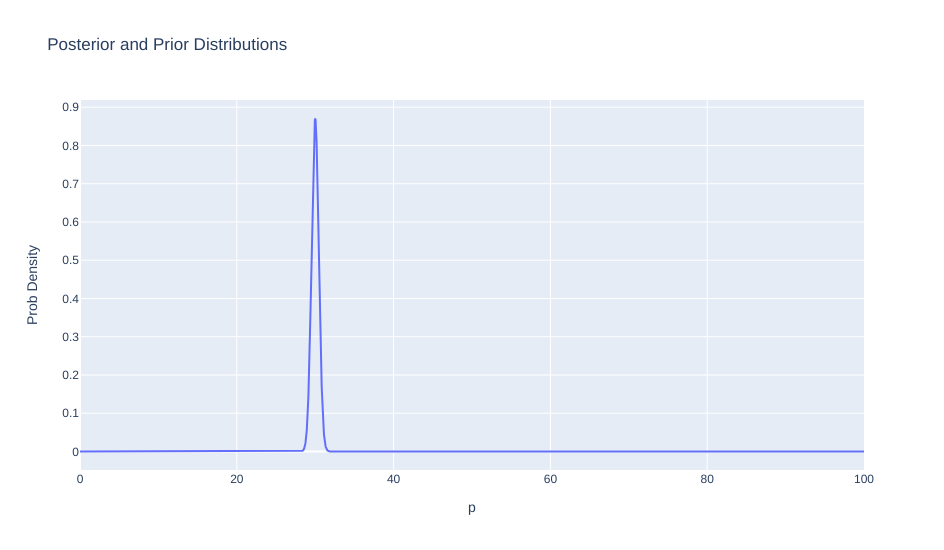

In [31]:
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

prior_conv = 0.3

a_total = 100
a_conv = a_total * prior_conv

#x = np.linspace(0, 1, 1001)
x = np.linspace(0, a_total, 10000)
fig = go.Figure()

# Norm
mu = a_conv
var = a_total * prior_conv * (1 - prior_conv)
sigma = np.sqrt(var)
stderrmean = sigma / np.sqrt(a_total)
print(mu, stderrmean)

fig.add_trace(go.Scatter(x=x, y=stats.norm.pdf(x, loc=mu, scale=stderrmean), mode='lines',
                         name=f"<br>total = {a_total}, conv = {a_conv}<br>mu={mu}, stderrmean={stderrmean}"))


#Uniform prior
# beta_prior = 1
# alpha_prior = 1

# alpha_post = alpha_prior + a_conv
# beta_post = beta_prior + (a_total - a_conv)
# fig.add_trace(go.Scatter(x=x, y=stats.beta.pdf(x, alpha_post, beta_post), mode='lines',
#                          name=f"<br>A: total = {a_total}, conv = {a_conv}<br>alpha_prior={alpha_prior}, beta_prior={beta_prior},<br>alpha_post={alpha_post}, beta_post={beta_post}"))



fig.update_layout(title='Posterior and Prior Distributions',
                  xaxis_title='p',
                  yaxis_title='Prob Density',
                  hovermode="x",
                  height=550)

fig.show()

0.4 0.15491933384829665


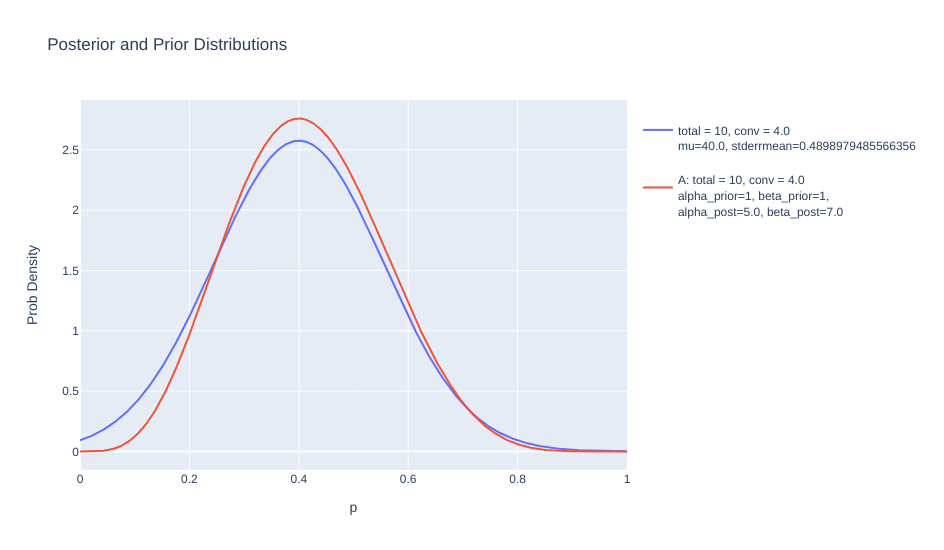

In [5]:
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

prior_conv = 0.4

a_total = 10
a_conv = a_total * prior_conv

x = np.linspace(0, 1, 1001)
fig = go.Figure()

# Norm
## mu = 1 * a_conv + 0 * (a_total - a_conv)
## mu_c = 1 * (a_conv / a_total) + 0 * (a_total - a_conv) / a_total = a_conv / a_total
## std_c = sqrt( ( (1 - mu_c)^2 * a_conv + (0 - mu_c)^2 * (a_total - a_conv) ) / a_total )
##       = sqrt( (1 - mu_c)^2 mu_c + mu_c^2 (1 - mu_c) )
##       = sqrt( mu_c (1 - mu_c) )

mu_c = a_conv / a_total
sigma_c = np.sqrt(mu_c * (1 - mu_c))
stderrmean_c = sigma_c / np.sqrt(a_total)
print(mu_c, stderrmean_c)

fig.add_trace(go.Scatter(x=x, y=stats.norm.pdf(x, loc=mu_c, scale=stderrmean_c), mode='lines',
                         name=f"<br>total = {a_total}, conv = {a_conv}<br>mu={mu}, stderrmean={stderrmean}"))


#Uniform prior
beta_prior = 1
alpha_prior = 1

alpha_post = alpha_prior + a_conv
beta_post = beta_prior + (a_total - a_conv)
fig.add_trace(go.Scatter(x=x, y=stats.beta.pdf(x, alpha_post, beta_post), mode='lines',
                         name=f"<br>A: total = {a_total}, conv = {a_conv}<br>alpha_prior={alpha_prior}, beta_prior={beta_prior},<br>alpha_post={alpha_post}, beta_post={beta_post}"))



fig.update_layout(title='Posterior and Prior Distributions',
                  xaxis_title='p',
                  yaxis_title='Prob Density',
                  hovermode="x",
                  height=550)

fig.show()

**Насколько один вариант лучше другого?**

Нужно $P(p_A/p_B)$ или $P(p_A - p_B)$.  
Распределение $P(p_A/p_B)$ обычно не считают - ограничиваются отношением средних в выборках $p_A/p_B$.  

Cчитают $P(p_A - p_B)$.  
С учетом предположений о нормальном распределении $p_A, p_B$
$$
P(p_A - p_B) = N(p_A - p_B; s_{AB}) 
\\
s_{AB} = \sqrt{s_A^2 / N_1 + s_B^2 / N_2} * \sqrt{N_1 + N_2} \quad \mbox{(или что-то вроде)}
$$
(См. https://mathworld.wolfram.com/NormalDifferenceDistribution.html, https://math.stackexchange.com/questions/917276/distribution-of-the-difference-of-two-normal-random-variables, https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables, https://en.wikipedia.org/wiki/Normal_distribution#Operations_on_normal_deviates)

При этом предположения о нормальном распределении $p_A, p_B$ излишне оптимистичны.  
Поэтому оценка разности также будет занижена.  

Можно попробовать проверить сэмплированием.

0.4 0.015491933384829668
0.44000000000000006 0.015697133496278867
0.040000000000000036 0.022054478003344355


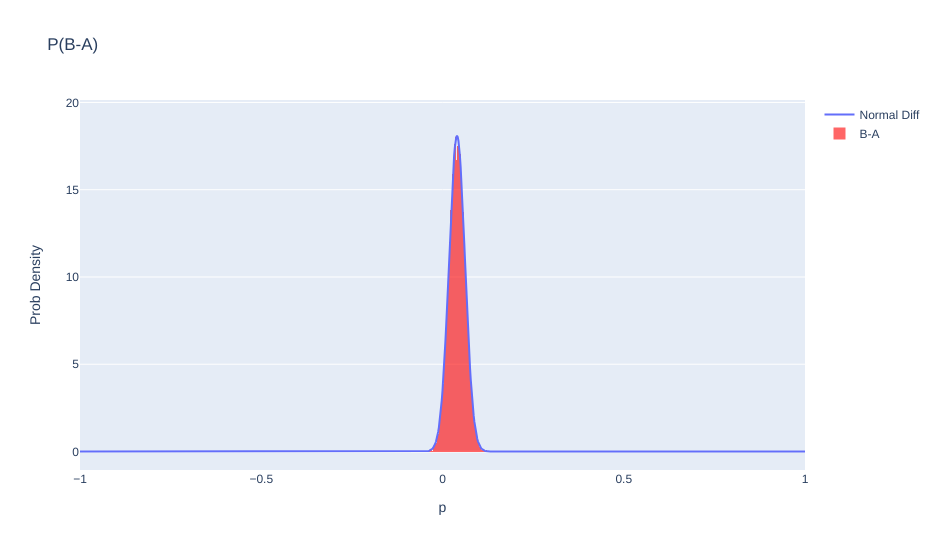

In [11]:
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

prior_conv = 0.4

a_total = 1000
a_conv = a_total * prior_conv

b_total = 1000
b_conv = b_total * prior_conv * 1.1

x = np.linspace(-1, 1, 1001)
fig = go.Figure()

# Norm
mu_a = a_conv / a_total 
stderrmean_a = np.sqrt(mu_a * (1 - mu_a)) / np.sqrt(a_total)
print(mu_a, stderrmean_a)

mu_b = b_conv / b_total 
stderrmean_b = np.sqrt(mu_b * (1 - mu_b)) / np.sqrt(b_total)
print(mu_b, stderrmean_b)

mu_diff = mu_b - mu_a
stderrmean_diff = np.sqrt(stderrmean_a**2 + stderrmean_b**2)
print(mu_diff, stderrmean_diff)

fig.add_trace(go.Scatter(x=x, y=stats.norm.pdf(x, loc=mu_diff, scale=stderrmean_diff), mode='lines',
                         name=f"Normal Diff"))


#Beta
beta_prior = 1
alpha_prior = 1
alpha_post_a = alpha_prior + a_conv
beta_post_a = beta_prior + (a_total - a_conv)
n_post_sample = 50000
post_sample_a = np.random.beta(alpha_post_a, beta_post_a, n_post_sample)
alpha_post_b = alpha_prior + b_conv
beta_post_b = beta_prior + (b_total - b_conv)
post_sample_b = np.random.beta(alpha_post_b, beta_post_b, n_post_sample)
post_sample_diff = post_sample_b - post_sample_a


fig.add_trace(go.Histogram(x=post_sample_diff, histnorm='probability density', 
                           name='B-A', marker_color='red',
                           opacity=0.6))


fig.update_layout(title='P(B-A)',
                  xaxis_title='p',
                  yaxis_title='Prob Density',
                  hovermode="x",
                  height=550)

fig.show()

**Какой вариант лучше?**

Нужно $P(p_A > p_B)$.

Обычно пытаются проверять статистические гипотезы.  
Предполагают $p_A = p_B$ и считают, какова вероятность получить имеющиеся средние: $P(p_{mu,A}, p_{mu,B} | p_A = p_B)$.

Для t-тестов вместо статистических гипотез можно посчитать понятное значение $P(p_B > p_A)$ с помощью
кумулятивной функции распределения нормального распределения.

$$
P(p_A > p_B) = \mbox{norm.diff.cdf(x=0)}
\\
P(p_B > p_A) = 1 - \mbox{norm.diff.cdf(x=0)}.
$$

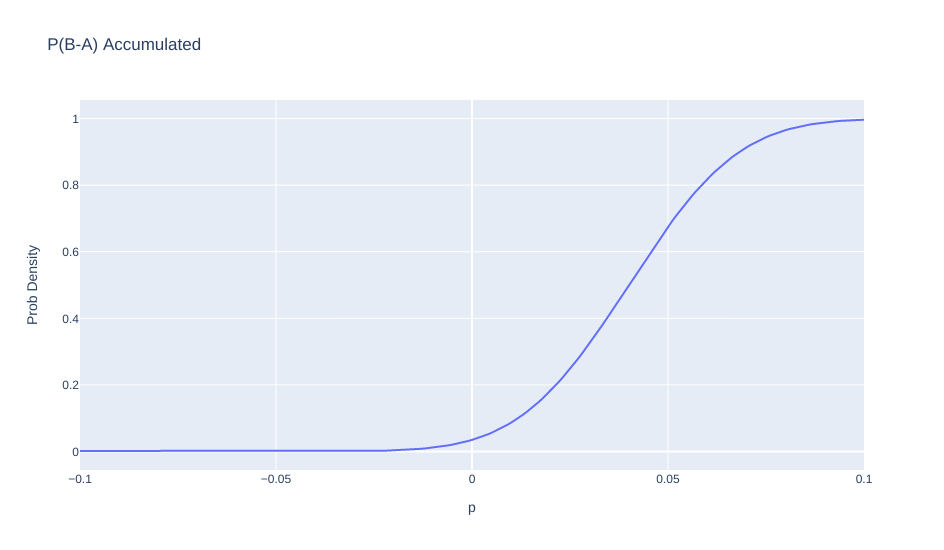

P(pa > pb) = 0.034862684591756274, P(pb > pa) = 0.9651373154082438
P(pa > pb) = 0.03391999999999995, P(pb > pa) = 0.96608


In [22]:
x = np.linspace(-0.5, 0.5, 1001)
fig = go.Figure()
# fig.add_trace(go.Scatter(x=x, y=stats.norm.pdf(x, loc=mu_diff, scale=stderrmean_diff), mode='lines',
#                          name=f"Normal Diff"))
fig.add_trace(go.Scatter(x=x, y=stats.norm.cdf(x, loc=mu_diff, scale=stderrmean_diff), mode='lines',
                         name=f"Normal Diff Accumulated"))
fig.update_layout(title='P(B-A) Accumulated',
                  xaxis_title='p',
                  yaxis_title='Prob Density',
                  hovermode="x",
                  xaxis_range=[-0.1, 0.1],
                  height=550)

fig.show()


pa_gt_pb_norm = stats.norm.cdf(x=0, loc=mu_diff, scale=stderrmean_diff)
pb_gt_pa_norm = 1 - pa_gt_pb_norm
print(f"P(pa > pb) = {pa_gt_pb_norm}, P(pb > pa) = {pb_gt_pa_norm}")

#diff = B - A
pb_gt_pa_diff = len(post_sample_diff[post_sample_diff > 0]) / len(post_sample_diff)
pa_gt_pb_diff = 1 - pb_gt_pa_diff
print(f"P(pa > pb) = {pa_gt_pb_diff}, P(pb > pa) = {pb_gt_pa_diff}")

**Проверка статистической гипотезы $p_A = p_B$**

Во-первых, вопрос о $p_A = p_B$ - это не тот вопрос, на который нужно отвечать.  
Нужно $P(p_A > p_B)$ -- см. выше.  

Во-вторых, способ проверки гипотезы вызывает вопросы.  
Предполагают $p_A = p_B$ и считают, какова вероятность получить имеющиеся средние: $P(p_{mu,A}, p_{mu,B} | p_A = p_B)$.

Выбирают уровень значимости $\alpha$.  
Обычно $\alpha = 0.95$.  
Находят симметричный относительно центра интервал, внутри которого лежит $\alpha$ плотности вероятности.  
Для $\alpha = 0.95$ это [mu_diff - 2 s_diff, mu_diff + 2 s_diff].  
По распределению разности проверяют, лежит ли точка 0 в интервале [mu_diff - 2 s_diff, mu_diff + 2 s_diff].  
Если попадает, то гипотеза не отвергается.  
Если не попадает, то отвергается.  

**Сколько должен продолжаться эксперимент?**  

Для конверсий дисперсия связана со средним.  
Можно задаться величиной эффекта.  
Оценить, как будут выглядеть распределения средних.  
На этом основании оценить, сколько нужно наблюдений для детектирования эффекта с определенной вероятностью.  


Если дисперсия заранее неизвестна, то возникают проблемы с оценкой длительности.  
Не ясно, чему равна стандартная ошибка среднего.


Еще есть проблема подглядывания.  
Оценку длительности предлагается фиксировать до начала эксперимента.  


**Откуда берется t-тест**  

См. https://en.wikipedia.org/wiki/Student%27s_t-test и https://en.wikipedia.org/wiki/Student's_t-distribution .  

$$
\frac{X - \mu}{S/\sqrt{n}}
$$
X - sample mean, S - Bessel-corrected sample variance.

При больших N t-распределение почти совпадает с нормальным.